Setup and Libraries



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
# Load the datasets
medication_df = pd.read_csv(r"C:\Users\44776\Documents\API PROJECT\Resident report\medications.csv")
resident_df = pd.read_csv(r"C:\Users\44776\Documents\API PROJECT\Resident report\Residents.csv")
staff_df = pd.read_csv(r"C:\Users\44776\Documents\API PROJECT\Resident report\staff.csv")

In [4]:
medication_df.head()

,Unnamed: 0,MedicationID,Medication Name,Dosage,Prescription End Date,ResidentID
0,0,1,Allopurinol,500mg,2024-07-27 15:31:23.721305,446
1,1,2,Amlodipine,500mg,2024-04-03 15:31:23.721346,720
2,2,3,Allopurinol,100mg,2024-06-09 15:31:23.721355,216
3,3,4,Atorvastatin,100mg,2024-01-15 15:31:23.721362,807
4,4,5,Lisinopril,5mg,2024-06-21 15:31:23.721370,482


In [5]:
# List of DataFrames to clean
dataframes = {
    'Medication': medication_df,
    'Resident': resident_df,
    'Staff': staff_df
}

for name, df in dataframes.items():
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
        print(f"'Unnamed: 0' column removed from {name} dataset.")
    else:
        print(f"No 'Unnamed: 0' column found in {name} dataset.")


'Unnamed: 0' column removed from Medication dataset.
'Unnamed: 0' column removed from Resident dataset.
'Unnamed: 0' column removed from Staff dataset.


In [6]:
# Display the first few rows to verify
print("Medication Dataset:")
print(medication_df.head())

print("\nResident Dataset:")
print(resident_df.head())

print("\nStaff Dataset:")
print(staff_df.head())

Medication Dataset:
   MedicationID Medication Name Dosage       Prescription End Date  ResidentID
0             1     Allopurinol  500mg  2024-07-27 15:31:23.721305         446
1             2      Amlodipine  500mg  2024-04-03 15:31:23.721346         720
2             3     Allopurinol  100mg  2024-06-09 15:31:23.721355         216
3             4    Atorvastatin  100mg  2024-01-15 15:31:23.721362         807
4             5      Lisinopril    5mg  2024-06-21 15:31:23.721370         482

Resident Dataset:
   ResidentID             Name Date of Birth  Gender Admission Date  \
0           1      Linda Smith    1951-10-13  Female     2023-09-07   
1           2       Jane Davis    1937-03-22   Other     2022-04-29   
2           3      James Brown    1957-12-22  Female     2018-03-21   
3           4      Jane Wilson    1952-01-10   Other     2022-01-11   
4           5  Patricia Miller    1920-08-22   Other     2022-08-26   

   Room Number Care Level  
0          254       High  
1   

In [9]:
# Check for missing values
print("Missing values in Medication dataset:")
print(medication_df.isnull().sum())

print("\nMissing values in Resident dataset:")
print(resident_df.isnull().sum())

print("\nMissing values in Staff dataset:")
print(staff_df.isnull().sum())


Missing values in Medication dataset:
Unnamed: 0                0
MedicationID              0
Medication Name           0
Dosage                   60
Prescription End Date     0
ResidentID                0
dtype: int64

Missing values in Resident dataset:
Unnamed: 0        0
ResidentID        0
Name              0
Date of Birth     0
Gender            0
Admission Date    0
Room Number       0
Care Level        0
dtype: int64

Missing values in Staff dataset:
Unnamed: 0         0
StaffID            0
Name               0
Date of Birth      0
Gender             0
Job Title          0
Employment Date    0
dtype: int64


In [11]:
#  Dropping rows with missing ResidentID in Medication
medication_df = medication_df.dropna(subset=['ResidentID']) 


In [12]:
# Convert date columns to datetime
medication_df['Prescription End Date'] = pd.to_datetime(medication_df['Prescription End Date'])
resident_df['Date of Birth'] = pd.to_datetime(resident_df['Date of Birth'])
resident_df['Admission Date'] = pd.to_datetime(resident_df['Admission Date'])
staff_df['Date of Birth'] = pd.to_datetime(staff_df['Date of Birth'])
staff_df['Employment Date'] = pd.to_datetime(staff_df['Employment Date'])


In [14]:
# Rename 'residential' to 'ResidentID' in Medication dataset for clarity
medication_df.rename(columns={'residential': 'ResidentID'}, inplace=True)


In [15]:
# Merge Medication and Resident datasets
merged_df = pd.merge(medication_df, resident_df, on='ResidentID', how='left')

# Verify the merged data
print("Merged Dataset:")
print(merged_df.head())


Merged Dataset:
   Unnamed: 0_x  MedicationID Medication Name Dosage  \
0             0             1     Allopurinol  500mg   
1             1             2      Amlodipine  500mg   
2             2             3     Allopurinol  100mg   
3             3             4    Atorvastatin  100mg   
4             4             5      Lisinopril    5mg   

       Prescription End Date  ResidentID  Unnamed: 0_y            Name  \
0 2024-07-27 15:31:23.721305         446           445  William Garcia   
1 2024-04-03 15:31:23.721346         720           719      Mary Smith   
2 2024-06-09 15:31:23.721355         216           215  Linda Williams   
3 2024-01-15 15:31:23.721362         807           806   William Smith   
4 2024-06-21 15:31:23.721370         482           481     Mary Miller   

  Date of Birth  Gender Admission Date  Room Number Care Level  
0    1922-08-10  Female     2022-11-08          305   Moderate  
1    1945-01-16   Other     2021-03-12          298        Low  
2    19

In [16]:
merged_df

,Unnamed: 0_x,MedicationID,Medication Name,Dosage,Prescription End Date,ResidentID,Unnamed: 0_y,Name,Date of Birth,Gender,Admission Date,Room Number,Care Level
0,0,1,Allopurinol,500mg,2024-07-27 15:31:23.721305,446,445,William Garcia,1922-08-10,Female,2022-11-08,305,Moderate
1,1,2,Amlodipine,500mg,2024-04-03 15:31:23.721346,720,719,Mary Smith,1945-01-16,Other,2021-03-12,298,Low
2,2,3,Allopurinol,100mg,2024-06-09 15:31:23.721355,216,215,Linda Williams,1924-04-27,Other,2019-07-03,300,High
3,3,4,Atorvastatin,100mg,2024-01-15 15:31:23.721362,807,806,William Smith,1947-08-15,Female,2022-02-22,460,Moderate
4,4,5,Lisinopril,5mg,2024-06-21 15:31:23.721370,482,481,Mary Miller,1935-05-29,Other,2021-12-05,388,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Lisinopril,5mg,2024-06-09 15:31:23.741414,186,185,William Jones,1941-02-18,Male,2023-04-26,428,Low
1996,1996,1997,Allopurinol,500mg,2024-10-03 15:31:23.741420,213,212,Linda Brown,1921-04-20,Male,2020-09-15,474,High
1997,1997,1998,Lisinopril,10mg,2024-10-16 15:31:23.741424,987,986,James Jones,1952-10-14,Female,2020-02-24,136,Low
1998,1998,1999,Metformin,100mg,2024-07-01 15:31:23.741427,546,545,Michael Brown,1948-05-24,Female,2018-01-09,147,Low


Top 10 Most Prescribed Medications:
Lisinopril      417
Metformin       415
Allopurinol     401
Atorvastatin    396
Amlodipine      371
Name: Medication Name, dtype: int64


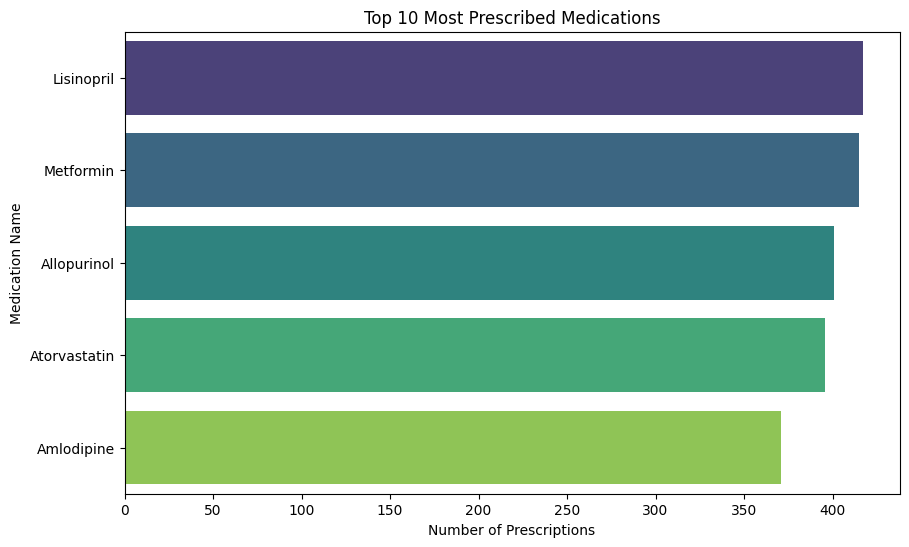

In [17]:
# Top 10 most prescribed medications
top_medications = merged_df['Medication Name'].value_counts().head(10)
print("Top 10 Most Prescribed Medications:")
print(top_medications)

# Plotting the top medications
plt.figure(figsize=(10,6))
sns.barplot(x=top_medications.values, y=top_medications.index, palette='viridis')
plt.title('Top 10 Most Prescribed Medications')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Medication Name')
plt.show()


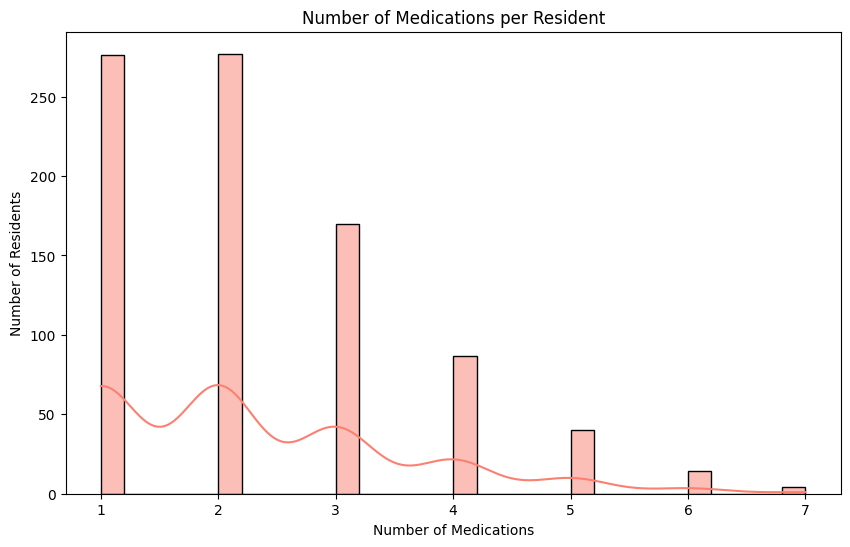

In [19]:
# Number of medications per resident
meds_per_resident = merged_df.groupby('ResidentID')['MedicationID'].count()

plt.figure(figsize=(10,6))
sns.histplot(meds_per_resident, bins=30, kde=True, color='salmon')
plt.title('Number of Medications per Resident')
plt.xlabel('Number of Medications')
plt.ylabel('Number of Residents')
plt.show()


Average Prescription Duration: 1302.32 days


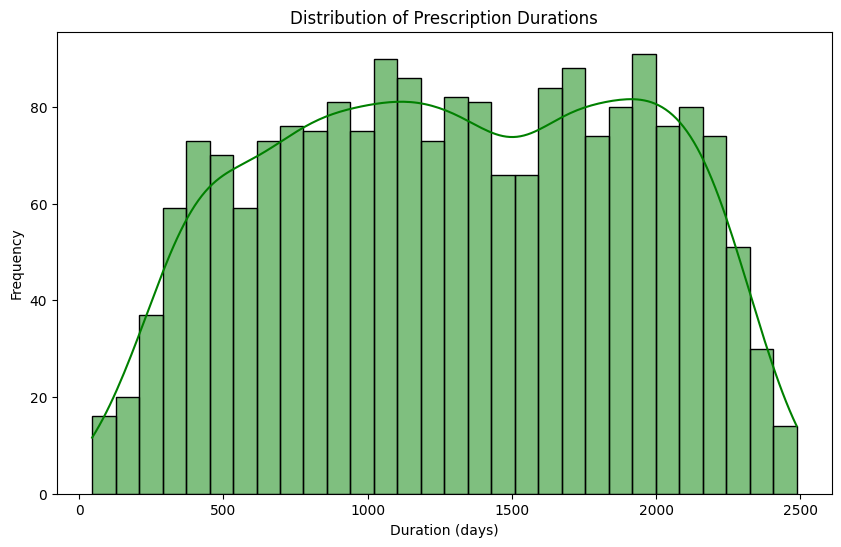

In [20]:
# Assuming there's a 'Prescription Start Date', but since it's not provided, we might infer from Admission Date
# Alternatively, calculate duration from Admission Date to Prescription End Date

# Calculate duration in days
merged_df['Prescription Duration'] = (merged_df['Prescription End Date'] - merged_df['Admission Date']).dt.days

# Handle negative durations or missing data
merged_df['Prescription Duration'] = merged_df['Prescription Duration'].apply(lambda x: x if x >=0 else None)

# Average prescription duration
avg_duration = merged_df['Prescription Duration'].mean()
print(f"Average Prescription Duration: {avg_duration:.2f} days")

# Distribution of Prescription Durations
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Prescription Duration'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Prescription Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()


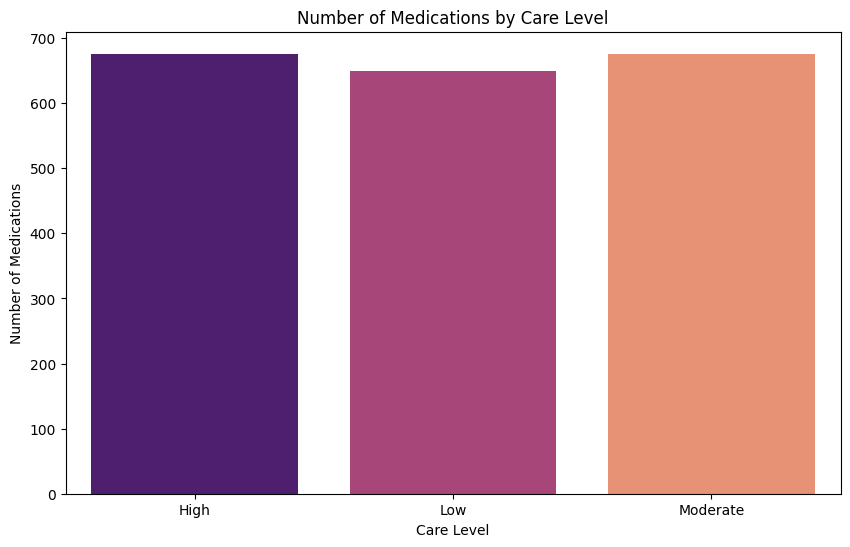

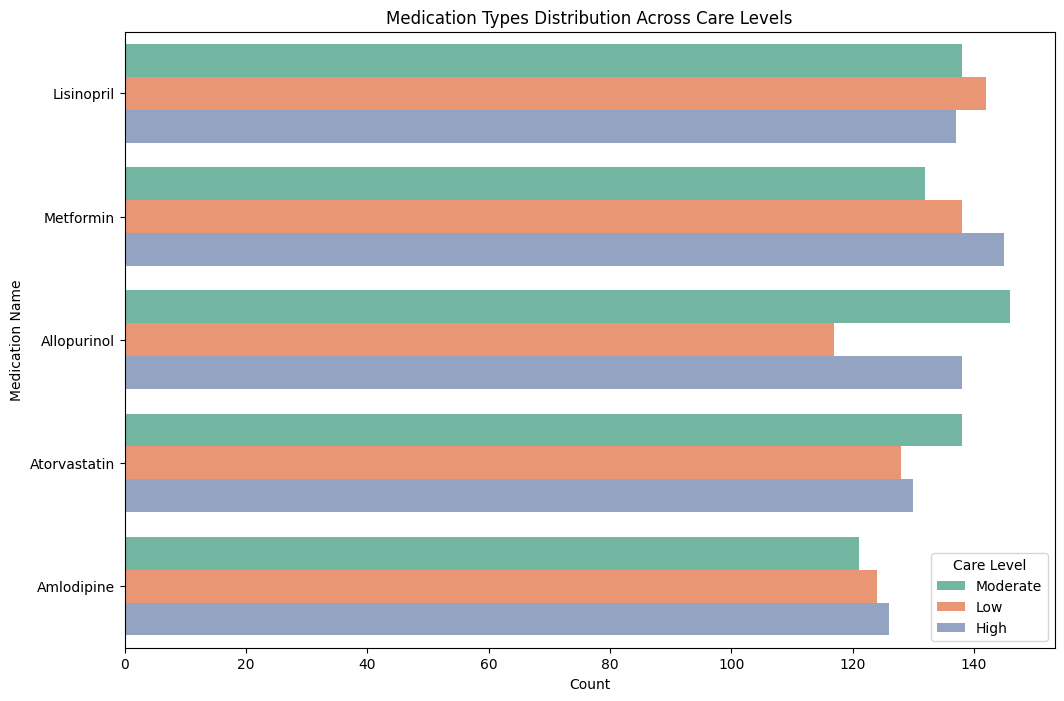

In [22]:
# Medication count by Care Level
meds_by_care = merged_df.groupby('Care Level')['MedicationID'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Care Level', y='MedicationID', data=meds_by_care, palette='magma')
plt.title('Number of Medications by Care Level')
plt.xlabel('Care Level')
plt.ylabel('Number of Medications')
plt.show()



# Medication types distribution across Care Levels
plt.figure(figsize=(12,8))
sns.countplot(data=merged_df, y='Medication Name', hue='Care Level', palette='Set2', order=merged_df['Medication Name'].value_counts().index)
plt.title('Medication Types Distribution Across Care Levels')
plt.xlabel('Count')
plt.ylabel('Medication Name')
plt.legend(title='Care Level')
plt.show()


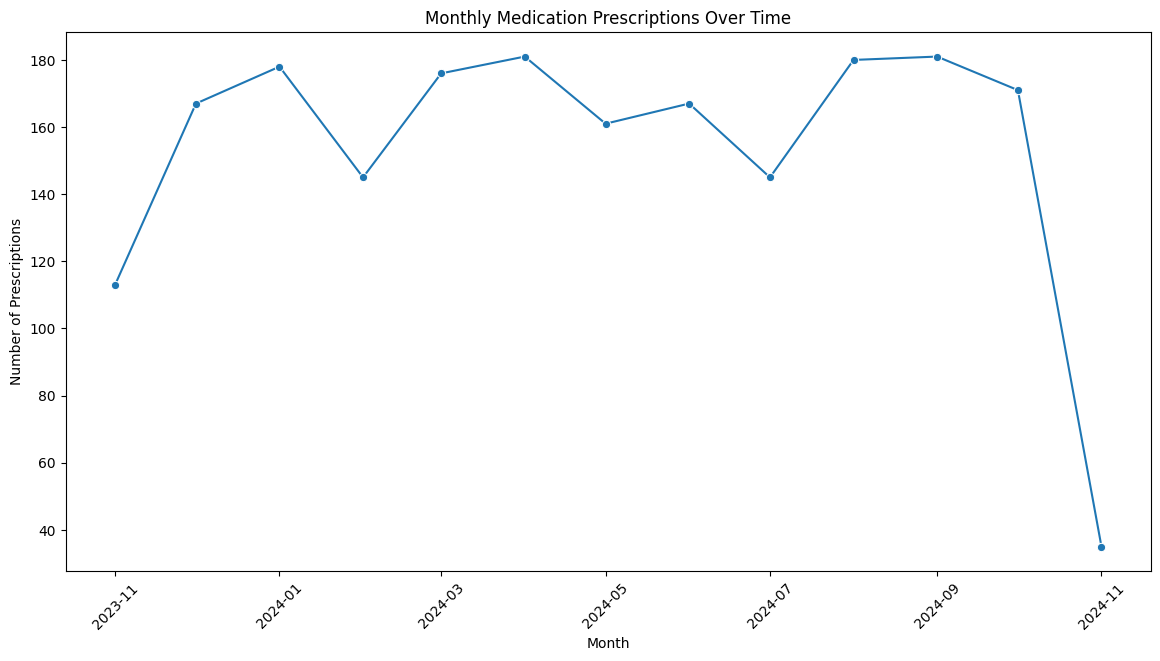

In [23]:
# Prescriptions per month
merged_df['Prescription Month'] = merged_df['Prescription End Date'].dt.to_period('M')
prescriptions_per_month = merged_df.groupby('Prescription Month')['MedicationID'].count().reset_index()
prescriptions_per_month['Prescription Month'] = prescriptions_per_month['Prescription Month'].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(x='Prescription Month', y='MedicationID', data=prescriptions_per_month, marker='o')
plt.title('Monthly Medication Prescriptions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Prescriptions')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Current date for calculations
current_date = pd.to_datetime('2024-10-10')

# Calculate ages
resident_df['Age'] = ((current_date - resident_df['Date of Birth']).dt.days) / 365.25
staff_df['Age'] = ((current_date - staff_df['Date of Birth']).dt.days) / 365.25

# Calculate duration of stay in days
resident_df['Duration_of_Stay'] = (current_date - resident_df['Admission Date']).dt.days

# Calculate staff tenure in days
staff_df['Tenure'] = (current_date - staff_df['Employment Date']).dt.days

# Calculate number of medications per resident
meds_per_resident = medication_df.groupby('ResidentID')['MedicationID'].count().reset_index()
meds_per_resident.rename(columns={'MedicationID': 'Medication_Count'}, inplace=True)
resident_df = resident_df.merge(meds_per_resident, on='ResidentID', how='left')
resident_df['Medication_Count'].fillna(0, inplace=True)

# Encode categorical variables
resident_df['Gender'] = resident_df['Gender'].map({'Male': 0, 'Female': 1})

In [25]:
# Merge Medication with Resident
merged_df = pd.merge(medication_df, resident_df, on='ResidentID', how='left')

# Optionally, incorporate Staff data if relevant
# For example, assign staff to residents based on Room Number or other criteria if available

# For this example, we'll focus on Resident and Medication data


In [26]:
# Similar to above, this requires temporal data. If not available, consider using current medication count as the target.

# Example target variable (current Medication_Count)
resident_df['Target_Medication_Count'] = resident_df['Medication_Count']  # Replace with future count if available


In [28]:
merged_df.head()

,Unnamed: 0_x,MedicationID,Medication Name,Dosage,Prescription End Date,ResidentID,Unnamed: 0_y,Name,Date of Birth,Gender,Admission Date,Room Number,Care Level,Age,Duration_of_Stay,Medication_Count
0,0,1,Allopurinol,500mg,2024-07-27 15:31:23.721305,446,445,William Garcia,1922-08-10,1.0,2022-11-08,305,Moderate,102.168378,702,3.0
1,1,2,Amlodipine,500mg,2024-04-03 15:31:23.721346,720,719,Mary Smith,1945-01-16,NaN,2021-03-12,298,Low,79.731691,1308,2.0
2,2,3,Allopurinol,100mg,2024-06-09 15:31:23.721355,216,215,Linda Williams,1924-04-27,NaN,2019-07-03,300,High,100.454483,1926,5.0
3,3,4,Atorvastatin,100mg,2024-01-15 15:31:23.721362,807,806,William Smith,1947-08-15,1.0,2022-02-22,460,Moderate,77.155373,961,2.0
4,4,5,Lisinopril,5mg,2024-06-21 15:31:23.721370,482,481,Mary Miller,1935-05-29,NaN,2021-12-05,388,High,89.368925,1040,5.0


In [29]:
print(resident_df['Care Level'].unique())

['High' 'Low' 'Moderate']


In [40]:
# Remove rows with any NaN values
resident_df.dropna(inplace=True)
print("Dropped rows with any NaN values.")

# Alternatively, drop columns with too many NaNs
# resident_df.drop(columns=['ColumnName'], inplace=True)


Dropped rows with any NaN values.


In [42]:
# Replace positive and negative infinity with NaN
resident_df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Replaced infinite values with NaN.")

# Now handle NaNs as previously
resident_df.dropna(inplace=True)  # or impute as needed
print("Handled NaN values after replacing infinities.")


Replaced infinite values with NaN.
Handled NaN values after replacing infinities.


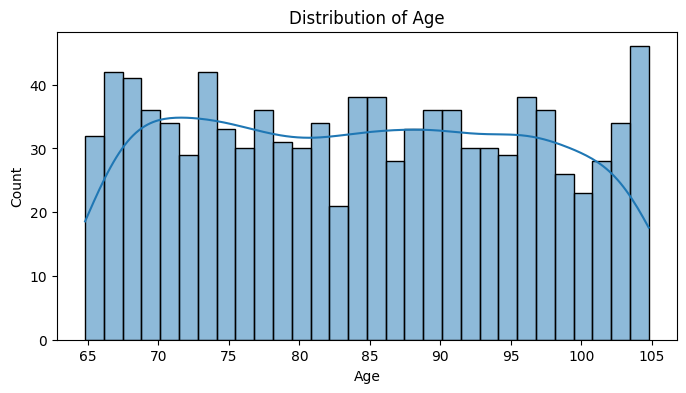

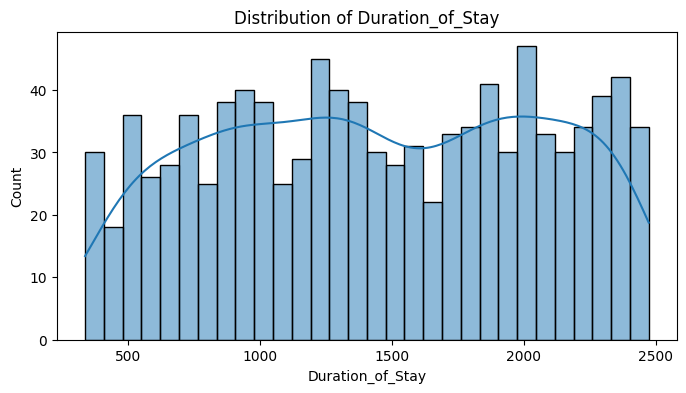

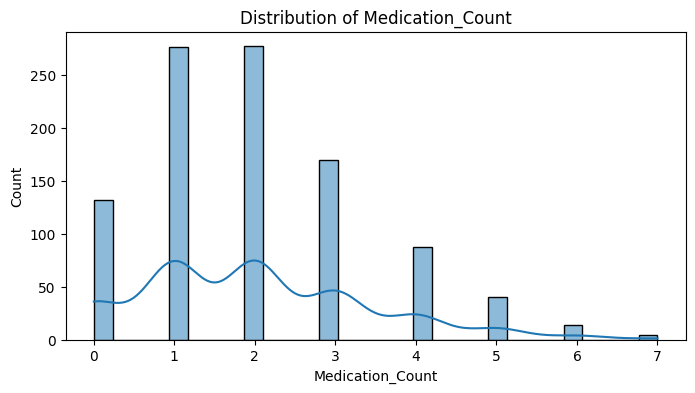

In [43]:
# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(resident_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [44]:
from scipy import stats

# Capping using the 99th percentile
for feature in numerical_features:
    upper_limit = resident_df[feature].quantile(0.99)
    resident_df[feature] = np.where(resident_df[feature] > upper_limit, upper_limit, resident_df[feature])
    print(f"Capped {feature} at the 99th percentile value {upper_limit}.")

# Alternatively, apply log transformation
# Be cautious: Log transformation requires all values to be positive
# for feature in numerical_features:
#     if (resident_df[feature] > 0).all():
#         resident_df[feature] = np.log1p(resident_df[feature])
#         print(f"Applied log transformation to {feature}.")


Capped Age at the 99th percentile value 104.49861738535249.
Capped Duration_of_Stay at the 99th percentile value 2459.02.
Capped Medication_Count at the 99th percentile value 6.0.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

# Define features and target
features = ['Age', 'Gender', 'Duration_of_Stay', 'Medication_Count']
X = resident_df[features]
y = resident_df['Care Level']  # Ensure 'Care Level' is encoded appropriately

# Encode 'Care Level' if it's categorical
from sklearn.preprocessing import LabelEncoder
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)
    joblib.dump(le, 'care_level_label_encoder.joblib')  # Save the encoder for future use

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]  # For binary classification

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC if binary classification
if len(np.unique(y)) == 2:
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.36      0.35        67
           1       0.31      0.33      0.32        64
           2       0.34      0.32      0.33        69

    accuracy                           0.34       200
   macro avg       0.34      0.34      0.33       200
weighted avg       0.34      0.34      0.33       200

Confusion Matrix:
[[24 22 21]
 [22 21 21]
 [23 24 22]]


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
# Example: One-Hot Encoding for 'Job Title' in Staff dataset
staff_df = pd.get_dummies(staff_df, columns=['Job Title'], drop_first=True)


Classification Report:
              precision  recall  f1-score  support
0                  0.35    0.36      0.35    67.00
1                  0.31    0.33      0.32    64.00
2                  0.34    0.32      0.33    69.00
accuracy           0.34    0.34      0.34     0.34
macro avg          0.34    0.34      0.33   200.00
weighted avg       0.34    0.34      0.33   200.00
Confusion Matrix:
[[24 22 21]
 [22 21 21]
 [23 24 22]]


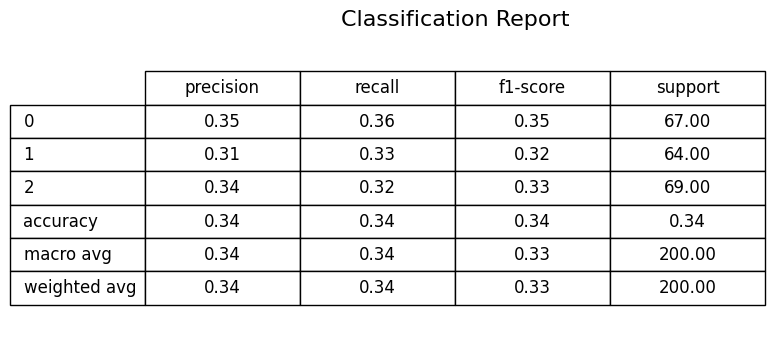

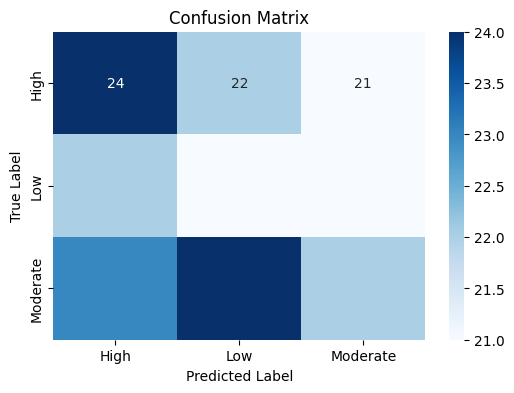

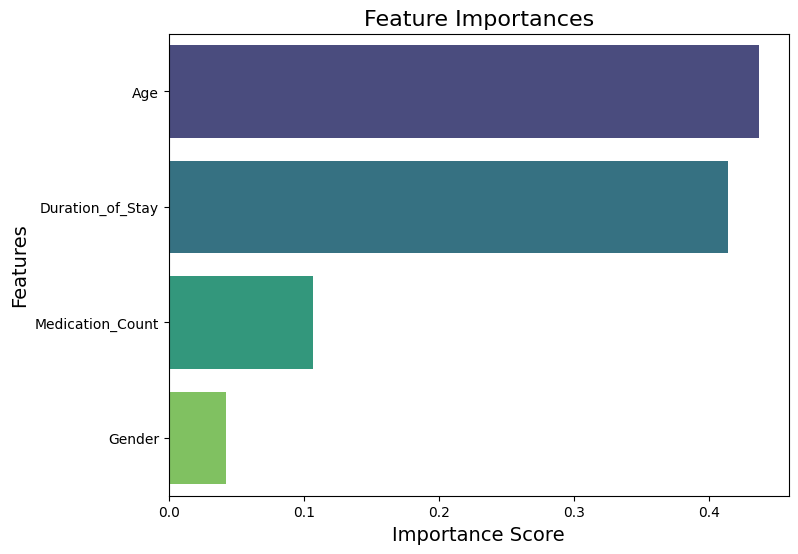

In [54]:
# Evaluate the model
print("Classification Report:")
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Round the classification report to 2 decimal points
report_df = report_df.round(2)

print(report_df)

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate ROC AUC if binary classification
if len(np.unique(y)) == 2:
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {roc_auc:.2f}")

# ---- Visualization Section ----

# 1. Classification Report Table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title('Classification Report', fontsize=16)

# Convert DataFrame to string with 2 decimal points
table_data = report_df.values.tolist()
# Format each number to two decimal places
table_data_formatted = []
for row in table_data:
    formatted_row = []
    for item in row:
        if isinstance(item, float):
            formatted_row.append(f"{item:.2f}")
        else:
            formatted_row.append(item)
    table_data_formatted.append(formatted_row)

# Create the table
table = plt.table(cellText=table_data_formatted,
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.show()

# 2. Confusion Matrix Heatmap
class_labels = le.classes_ if 'le' in locals() else ['Class 0', 'Class 1']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. ROC Curve
if len(np.unique(y)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# 4. Feature Importances
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

# 5. Precision-Recall Curve (Optional)
from sklearn.metrics import precision_recall_curve, average_precision_score

if len(np.unique(y)) == 2:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    average_precision = average_precision_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='purple',
             lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve', fontsize=16)
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')  # You can choose other scoring metrics

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best estimator
best_rf = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the best model
print("Optimized Classification Report:")
optimized_report = classification_report(y_test, y_pred_best, output_dict=True)
optimized_report_df = pd.DataFrame(optimized_report).transpose().round(2)
print(optimized_report_df)

print("Optimized Confusion Matrix:")
optimized_conf_matrix = confusion_matrix(y_test, y_pred_best)
print(optimized_conf_matrix)

# ROC AUC Score
if len(np.unique(y)) == 2:
    optimized_roc_auc = roc_auc_score(y_test, y_prob_best)
    print(f"Optimized ROC AUC Score: {optimized_roc_auc:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Classification Report:
              precision  recall  f1-score  support
0                  0.30    0.30      0.30     67.0
1                  0.24    0.23      0.24     64.0
2                  0.37    0.38      0.37     69.0
accuracy           0.30    0.30      0.30      0.3
macro avg          0.30    0.30      0.30    200.0
weighted avg       0.30    0.30      0.30    200.0
Optimized Confusion Matrix:
[[20 25 22]
 [26 15 23]
 [21 22 26]]
